In [1]:
import numpy as np
import scipy.linalg
from general_graph_utils import *
from tqdm import tqdm

# Set parameters to something known

In [2]:
def new_param_choice(G):
    """
    Extracts the label information for each edge in a NetworkX graph object. If G not labeled, labels are logarithmically sampled.
    
    Note: works for undirected graph, but if given a choice, better to use a directed graph
    
    Parameters
    ----------
    G : NetworkX graph object (directed)
            
    Returns
    -------
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels
        
    label_list : 1D numpy array
        list of edge labels in G
        
    """
    
    label_dict = {}
    
    if nx.is_weighted(G)==True:
        for i in range(len(G.edges())):
            label_dict[list(G.edges())[i]] = G.get_edge_data(list(G.edges)[i][0],list(G.edges)[i][1])['weight']
        
    elif nx.is_weighted(G)==False:
        label_dict = {e: 1.0 for e in G.edges}
        
    label_list = np.fromiter(label_dict.values(), dtype=float)
    
    return label_dict, label_list

In [3]:
def autocorrelation_analytical_wooo(observable,L,tau_n,alpha=1,beta=3):
    """
    Calculates the analytical solution for autocorrelation function given a Laplacian matrix
    
    Parameters
    ----------
    observable : 1D array
        possible values of observable (which is a state function on the Markov process)
    L : 2D array
        column-based Laplacian matrix of system (including diagonal entries)
    tau_n : 1D array
        range of intervals between values of observable taken by system
    alpha : scalar
        exponent
    beta : scalar
        exponent
    
    Returns
    -------
    t : 1D array
        forward autocorrelation function values
    t_rev : 1D array
        reverse autocorrelation function values
    
    """
    f = np.array([observable])
    fstar = f.T
    
    eigvals, eigvecs = scipy.linalg.eig(L)
    pi = np.array([eigvecs[:,np.argmin(np.abs(eigvals))].real/sum(eigvecs[:,np.argmin(np.abs(eigvals))].real)]).T
    
    # initialize forward and reverse autocorrelation function arrays
    t = np.zeros(len(tau_n))
    t_rev = np.zeros(len(tau_n))
    
    list_result = list(map(lambda i: scipy.linalg.expm(L*i), tau_n))
    
    # populate arrays with analytical solution to autocorrelation function
    for i in range(len(tau_n)):
        t[i] = f**alpha @ list_result[i] @(fstar ** beta * pi)
        t_rev[i] = f**beta @ list_result[i] @(fstar ** alpha * pi)
        
    return t, t_rev

In [4]:
def autocorrelation_analytical_wooo(observable,L,tau_n,alpha=1,beta=3):
    """
    Calculates the analytical solution for autocorrelation function given a Laplacian matrix
    
    Parameters
    ----------
    observable : 1D array
        possible values of observable (which is a state function on the Markov process)
    L : 2D array
        column-based Laplacian matrix of system (including diagonal entries)
    tau_n : 1D array
        range of intervals between values of observable taken by system
    alpha : scalar
        exponent
    beta : scalar
        exponent
    
    Returns
    -------
    t : 1D array
        forward autocorrelation function values
    t_rev : 1D array
        reverse autocorrelation function values
    
    """
    f = np.array([observable])
    fstar = f.T
    
    eigvals, eigvecs = scipy.linalg.eig(L)
    pi = np.array([eigvecs[:,np.argmin(np.abs(eigvals))].real/sum(eigvecs[:,np.argmin(np.abs(eigvals))].real)]).T
    
    # initialize forward and reverse autocorrelation function arrays
    t = np.zeros(len(tau_n))
    t_rev = np.zeros(len(tau_n))
    
    list_result = list(map(lambda i: scipy.linalg.expm(L*i), tau_n))
    
    # populate arrays with analytical solution to autocorrelation function
    for i in range(len(tau_n)):
        t[i] = f**alpha @ list_result[i] @(fstar ** beta * pi)
        t_rev[i] = f**beta @ list_result[i] @(fstar ** alpha * pi)
        
    return t, t_rev

In [5]:
def make_observable(node_list):
    
    num_nodes = len(node_list)
    
    f = np.zeros(num_nodes)
    
    for i in range(0,num_nodes):
        f[i] = 3+(2*i)
    
    return f

In [6]:
n=10
G,G_ud = random_graph(n)

In [7]:
print(G)
print(G_ud)

DiGraph with 8 nodes and 44 edges
Graph with 8 nodes and 22 edges


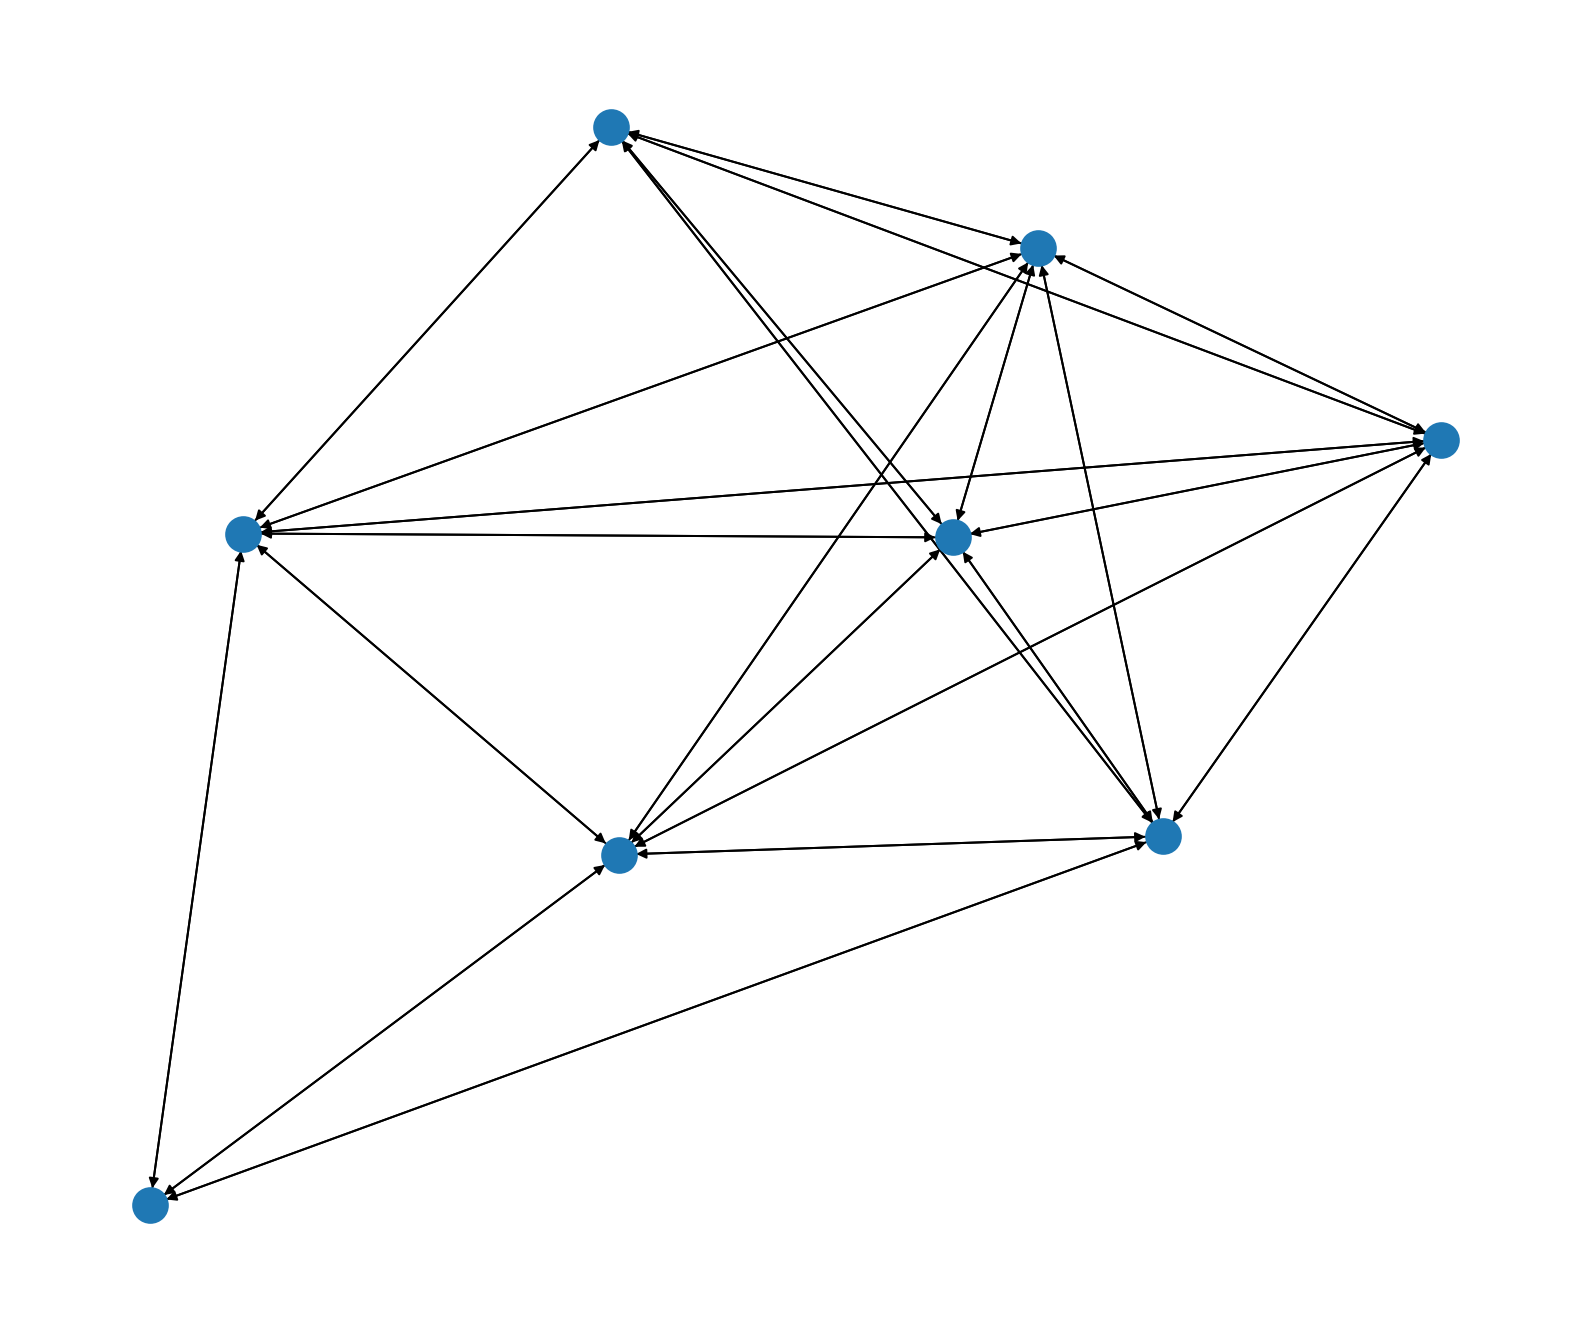

In [59]:
fig, ax = plt.subplots()
nx.draw(G)
fig.savefig('G_8_diagram.png')

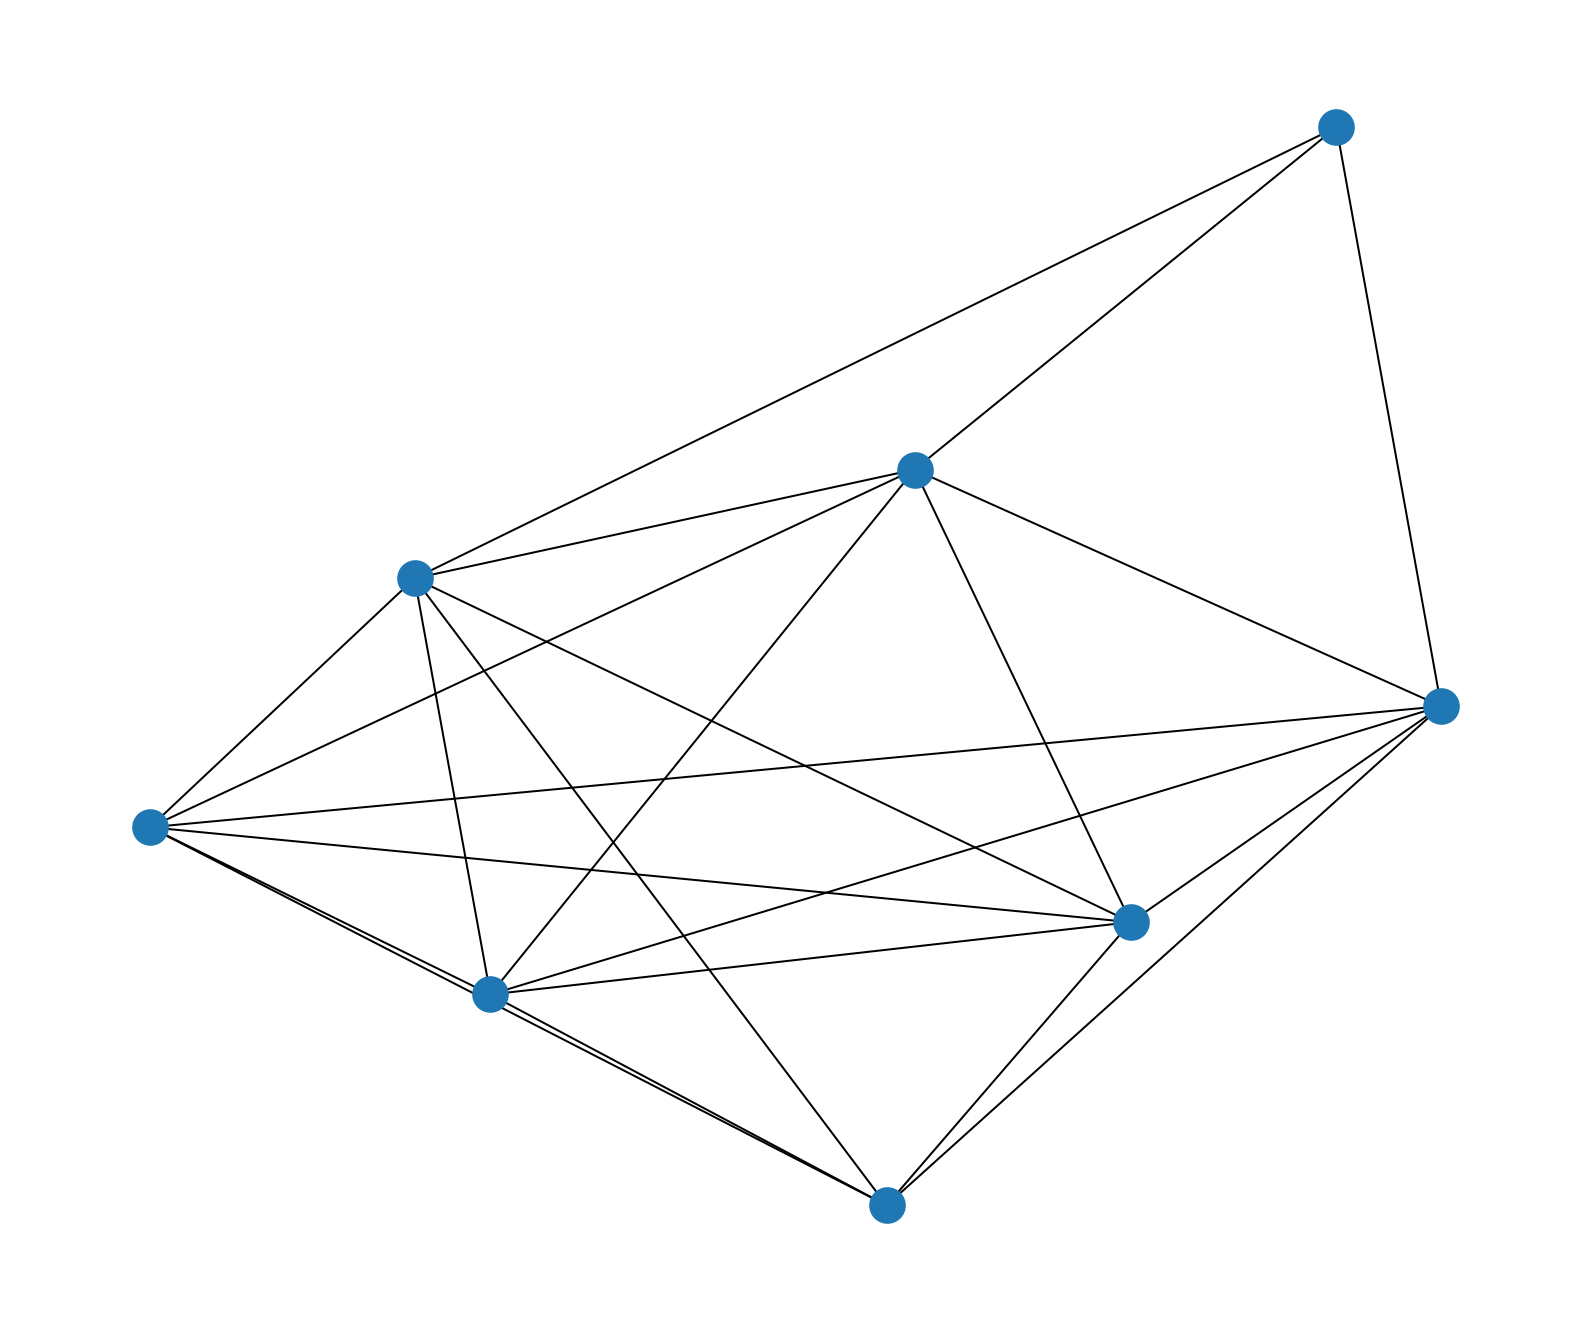

In [62]:
fig, ax = plt.subplots()
nx.draw(G_ud)
fig.savefig('Gud_8_diagram.png')

In [9]:
node_list = get_nodes(G)

In [10]:
edge_list = get_edges(G)

In [11]:
label_dict, label_list = new_param_choice(G)

In [12]:
print(label_dict)

{(1, 8): 1.0, (1, 3): 1.0, (1, 2): 1.0, (1, 4): 1.0, (1, 5): 1.0, (1, 7): 1.0, (2, 1): 1.0, (2, 5): 1.0, (2, 6): 1.0, (2, 3): 1.0, (2, 8): 1.0, (2, 7): 1.0, (3, 8): 1.0, (3, 5): 1.0, (3, 2): 1.0, (3, 1): 1.0, (3, 4): 1.0, (3, 7): 1.0, (4, 3): 1.0, (4, 5): 1.0, (4, 7): 1.0, (4, 1): 1.0, (4, 6): 1.0, (4, 8): 1.0, (5, 8): 1.0, (5, 1): 1.0, (5, 2): 1.0, (5, 3): 1.0, (5, 4): 1.0, (5, 6): 1.0, (6, 2): 1.0, (6, 5): 1.0, (6, 4): 1.0, (7, 3): 1.0, (7, 2): 1.0, (7, 4): 1.0, (7, 1): 1.0, (7, 8): 1.0, (8, 3): 1.0, (8, 2): 1.0, (8, 1): 1.0, (8, 4): 1.0, (8, 5): 1.0, (8, 7): 1.0}


In [13]:
cycle_list = get_cycle_nodes(G_ud)
print(cycle_list)

[[4, 5, 1], [2, 5, 1], [3, 5, 1], [8, 5, 1], [2, 6, 5], [4, 6, 5], [4, 3, 1], [7, 3, 1], [8, 3, 1], [2, 3, 1], [4, 7, 1], [2, 7, 1], [8, 7, 1], [8, 4, 1], [2, 8, 1]]


In [14]:
L = Laplacian_all(edge_list,label_list,node_list)

In [15]:
print(L)

[[-6.  1.  1.  1.  1.  0.  1.  1.]
 [ 1. -6.  1.  0.  1.  1.  1.  1.]
 [ 1.  1. -6.  1.  1.  0.  1.  1.]
 [ 1.  0.  1. -6.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -6.  1.  0.  1.]
 [ 0.  1.  0.  1.  1. -3.  0.  0.]
 [ 1.  1.  1.  1.  0.  0. -5.  1.]
 [ 1.  1.  1.  1.  1.  0.  1. -6.]]


In [16]:
eigvals, eigvecs = scipy.linalg.eig(L)

In [17]:
observable = make_observable(node_list)
print(observable)

[ 3.  5.  7.  9. 11. 13. 15. 17.]


In [18]:
tau_n = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

In [19]:
t,t_rev = autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

In [20]:
print(t[-1])
print(t_rev[-1])

16299.917948481908752
16299.917948481906933


In [21]:
np.abs(np.trapz(t)-np.trapz(t_rev))

3.265085979364812374e-10

In [22]:
import matplotlib.pyplot as plt

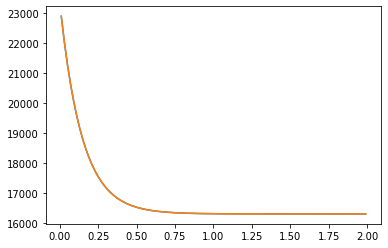

In [23]:
plt.plot(tau_n,t)
plt.plot(tau_n,t_rev)

In [24]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [25]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)

In [26]:
total_affinities = calculate_affinities(products_f, products_b, cycle_list)

In [27]:
print(total_affinities)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
cycle_labels_forward, edge_tracker = initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward)

In [29]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)

In [30]:
total_affinities = calculate_affinities(products_f, products_b, cycle_list)

In [31]:
for i in range(len(cycle_list)):
    label_dict[edge_tracker[i]] = cycle_labels_forward[i][0]

In [32]:
print(total_affinities)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
label_list = np.fromiter(label_dict.values(), dtype=float)

In [34]:
L = Laplacian_all(edge_list,label_list,node_list)

In [35]:
t,t_rev = autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

In [36]:
print(t[-1])
print(t_rev[-1])

16299.917948481908752
16299.917948481906933


In [37]:
np.abs(np.trapz(t)-np.trapz(t_rev))

3.265085979364812374e-10

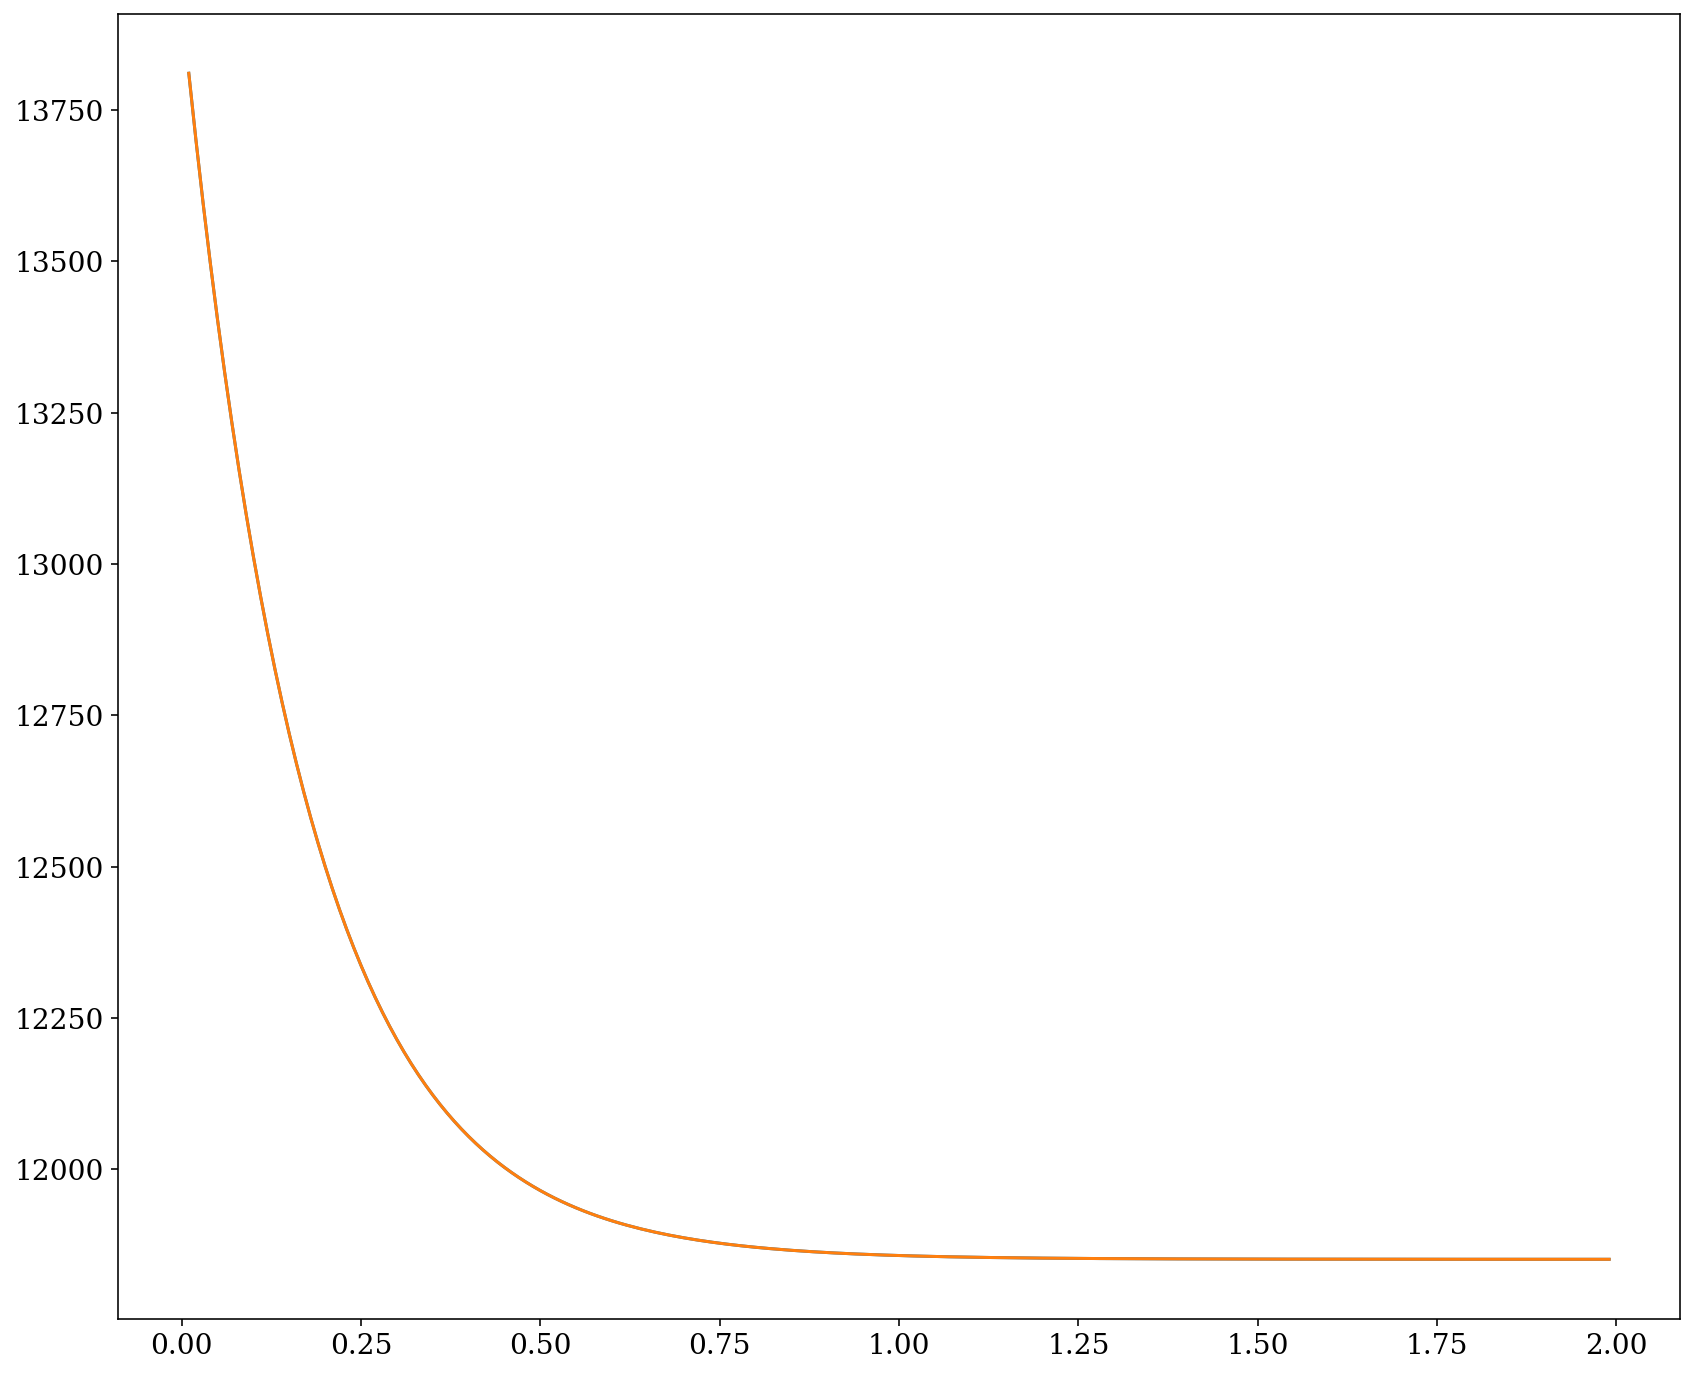

In [60]:
plt.plot(tau_n,t)
plt.plot(tau_n,t_rev)

In [39]:
Lstar = L.T
f = observable
fstar = observable.T
alpha=1
beta=3

In [40]:
eigvals, right_eigvecs = scipy.linalg.eig(L)
eigvals, left_eigvecs = scipy.linalg.eig(Lstar)

In [41]:
idx = np.argmax(eigvals)

In [42]:
pi = np.array([right_eigvecs[:,np.argmin(np.abs(eigvals))].real/sum(right_eigvecs[:,np.argmin(np.abs(eigvals))].real)])

In [43]:
eigvals = np.delete(eigvals,idx)
right_eigvecs = np.delete(right_eigvecs,idx, axis=1)
left_eigvecs = np.delete(left_eigvecs,idx, axis=1)

In [44]:
chis = np.zeros(len(eigvals))

In [45]:
for i in range(len(eigvals)):
    chi_f = np.dot(np.dot(f**alpha,right_eigvecs[:,i]),np.dot(np.multiply(fstar**beta, pi),left_eigvecs[:,i]))[0]
    chi_r = np.dot(np.dot(f**beta,right_eigvecs[:,i]),np.dot(np.multiply(fstar**alpha, pi),left_eigvecs[:,i]))[0]
    chis[i] = (chi_r-chi_f)/eigvals[i]

/var/folders/ch/f1rl6h5x4fx2wbg2_f5bj5dw0000gn/T/ipykernel_1886/1654868688.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  chis[i] = (chi_r-chi_f)/eigvals[i]


In [46]:
np.sum(chis)

-2.127099112521007e-14

# Try a force-area curve

In [61]:
num_cycles = len(cycle_list)
print(num_cycles)

15


In [48]:
N = 1000
all_affinities = np.zeros((N,num_cycles))
all_areas = np.zeros((N,1))

In [49]:
for i in tqdm(range(0,N)):
    
    # calculate and store the cycle affinity for each cycle
    products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
    total_affinities = calculate_affinities(products_f, products_b, cycle_list)
    
    all_affinities[i] = total_affinities
    
    # edit the record of the weights in the graph
    for j in range(num_cycles):
        label_dict[edge_tracker[j]] = cycle_labels_forward[j][0]
    
    label_list = np.fromiter(label_dict.values(), dtype=float)
    
    # calculate the Laplacian
    L = Laplacian_all(edge_list,label_list,node_list)
    
    # calculate the autocorrelation functions
    t, t_rev = autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)
    
    # calculate and store the area between them
    #print(np.abs(np.trapz(t_ex1)-np.trapz(t_rev_ex1)))
    all_areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))
    
    # perturb parameter in each cycle
    for cycle in cycle_labels_forward:
        cycle[0] = cycle[0]*1.01

100%|███████████████████████████████████████| 1000/1000 [06:54<00:00,  2.41it/s]


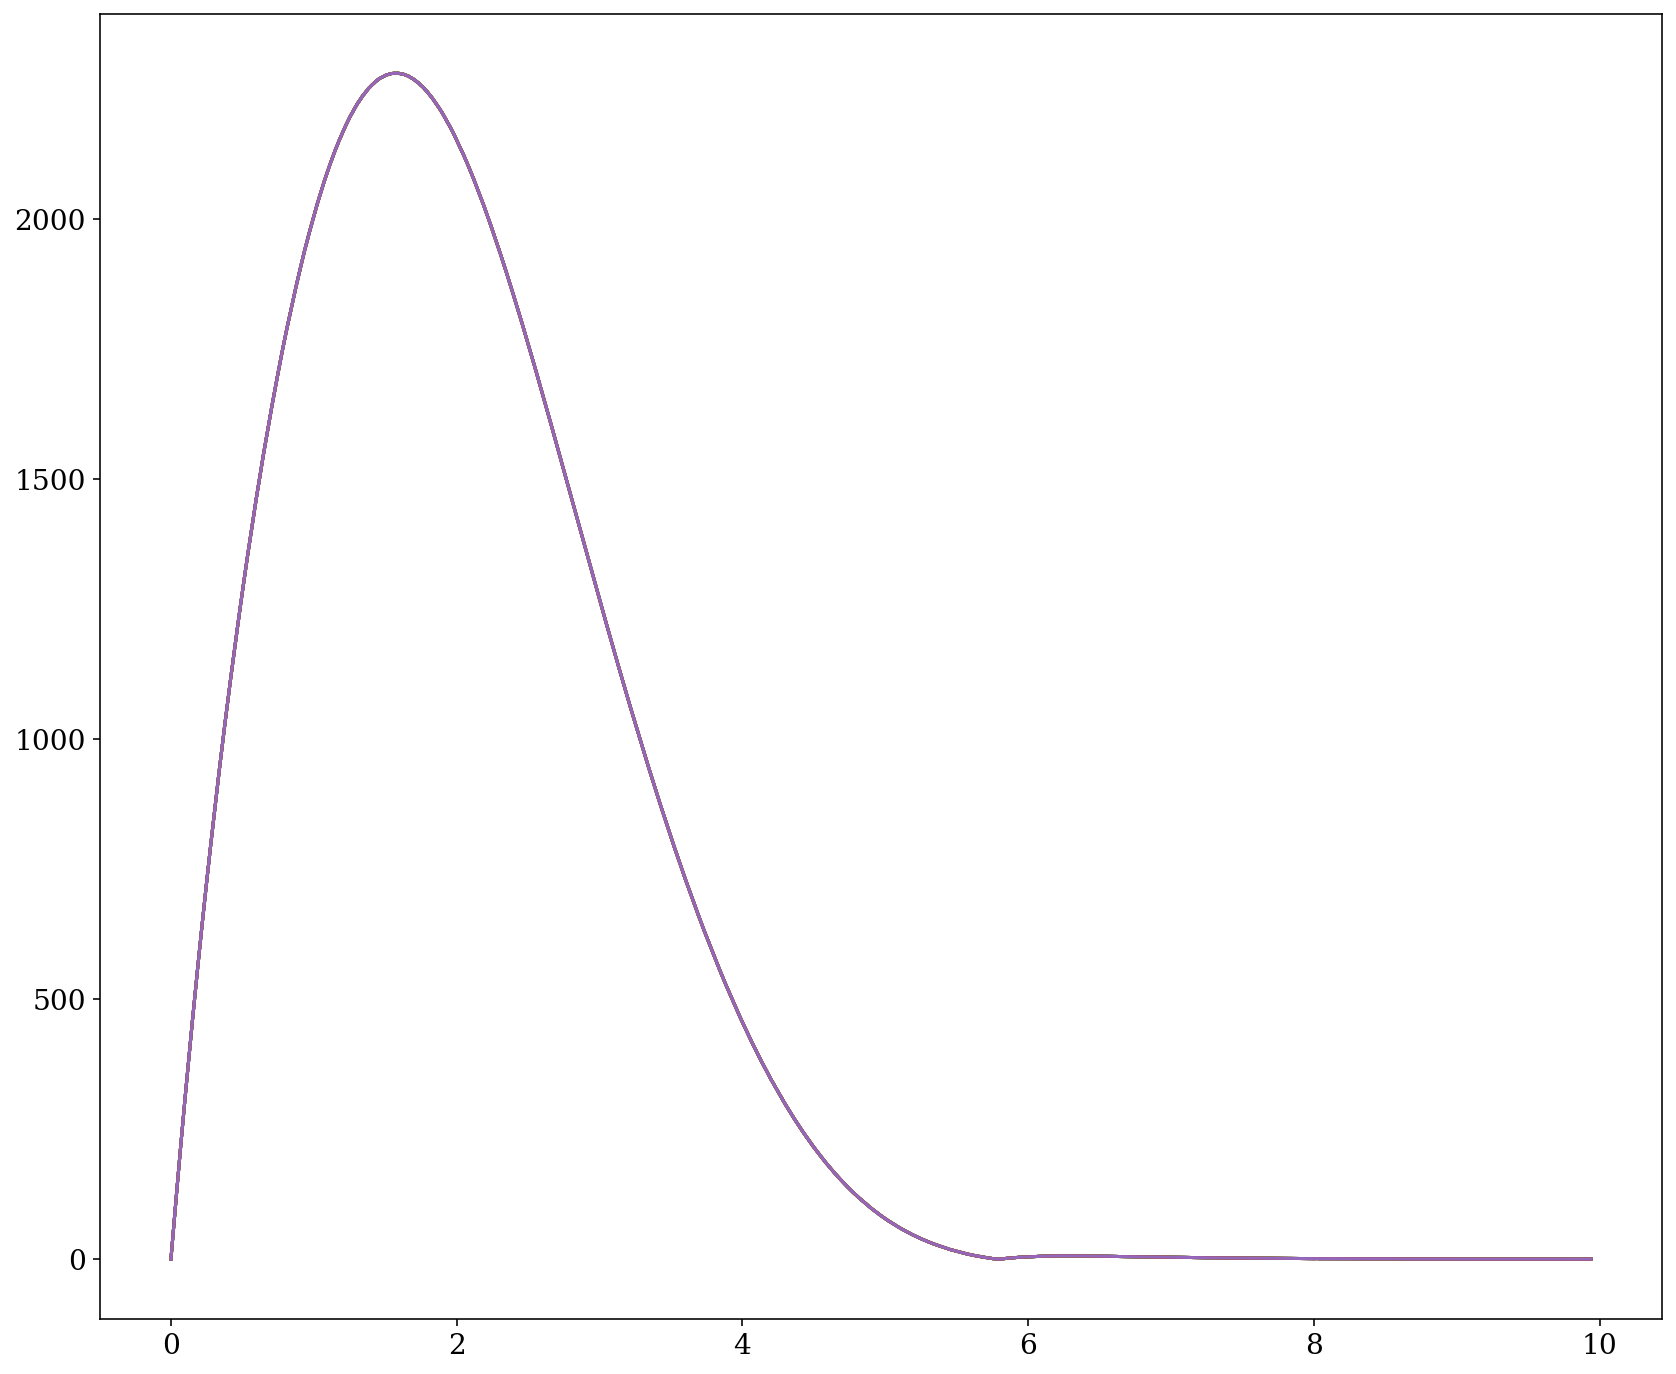

In [57]:
for i in range(0,num_cycles):
    plt.plot(all_affinities[:,i],all_areas)

In [51]:
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

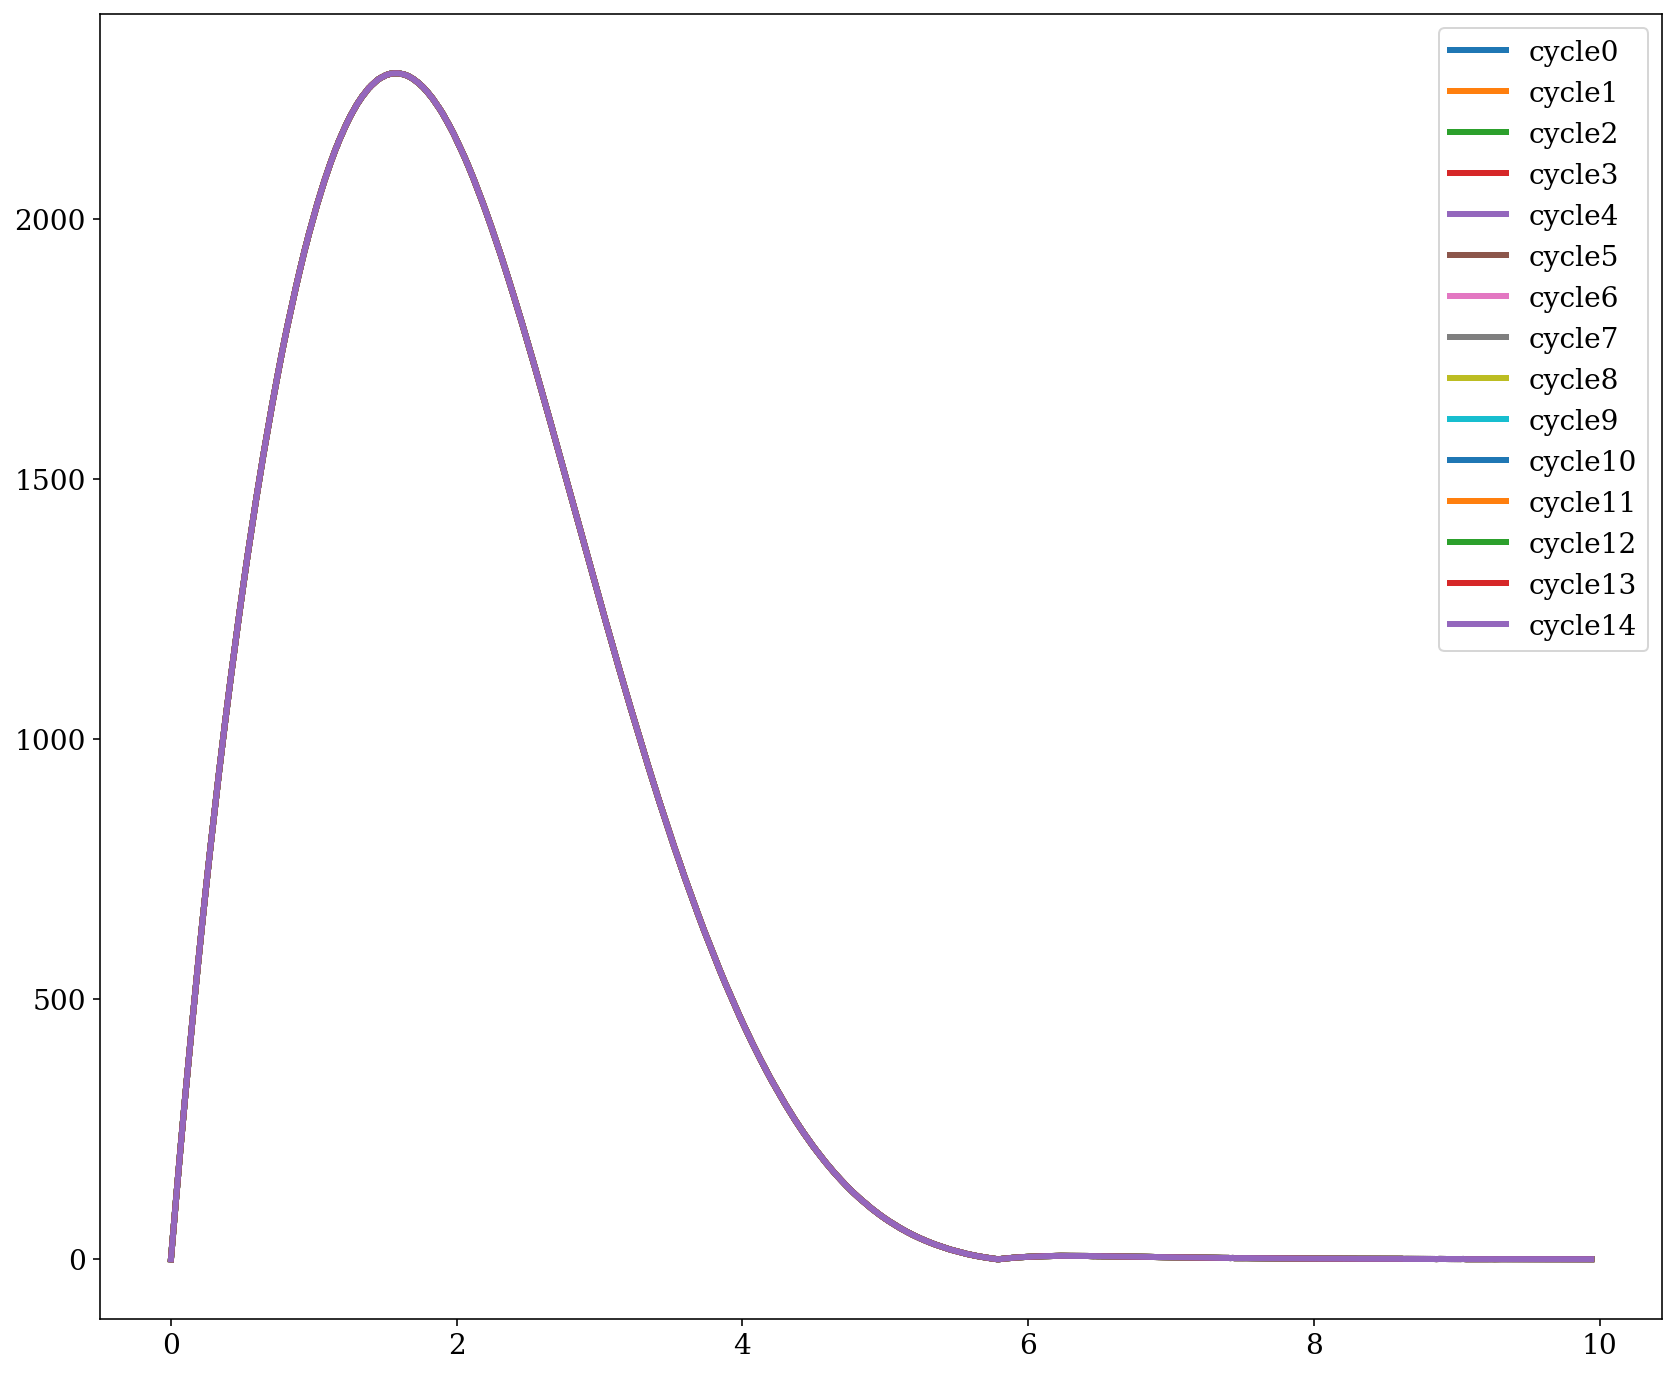

In [56]:
fig, ax = plt.subplots()
for i in range(0,num_cycles):
    plt.plot(all_affinities[:,i],all_areas,linewidth=3,label='cycle'+str(i))
plt.legend()
fig.savefig('G_8_forcearea_all1.png')

In [76]:
print(all_areas[583])

[0.26283987]


In [63]:
len(all_areas)

1000